# Part II - (FORD GOBIKE SYSTEM ANALYSIS)

## by (OLADEJO OLANREWAJU OLAWALE)

## Investigation Overview

In this investigation i wanted to look at what influence the trip duration of a ride, the main focus was on the influence of the gender, user type, and members age on trip duration.

## Dataset Overview

The data consists of information regarding 183412 bike rides, the attributes includes duration in seconds, start time, end time, start station id, start station name, start station latitude, start station longitude, end station id, end station name, end station latitude, end station longitude, bike id, user type, member birth year, member gender, bike share for all trip. 8,640 data points were removed from the analysis due to inconsistencies or missing information.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
gobike = pd.read_csv('gobike_clean.csv')
gobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,start_date,start_month,start_day_of_week,start_hour_of_trip,end_date,end_month,end_day_of_week,end_hour_of_trip,member_age,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,2019-02-28,February,Thursday,17,2019-03-01,March,Friday,8,35.0,869.750000
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,2019-02-28,February,Thursday,12,2019-03-01,March,Friday,5,47.0,1030.900000
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,2019-02-28,February,Thursday,17,2019-03-01,March,Friday,4,30.0,608.166667
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,2019-02-28,February,Thursday,23,2019-03-01,March,Friday,0,45.0,26.416667
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,2019-02-28,February,Thursday,23,2019-03-01,March,Friday,0,60.0,29.883333


## Distribution of Duration in minutes

Duration in minutes in the dataset take on a very large range of values, from about 1 minute at the lowest, to about 1400 minutes at the highest. Zooming in on the plot to have a closer look by removing outliers exceeding 60 minutes trip duration and it indicated that most trips lasted between 5 and 13 minutes.

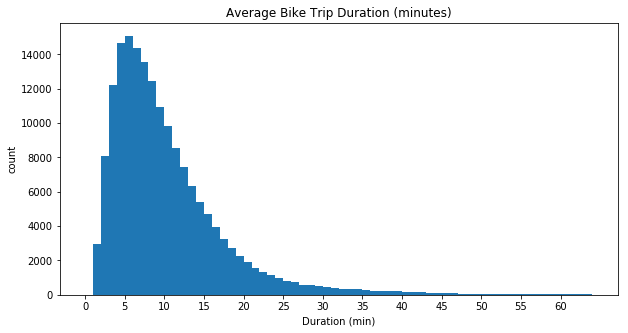

In [3]:
# Plotting an histogram for the duration in minutes and reducing the plot limit to zoom in the data
# accessing average rides below 60mins

bins = np.arange(0, 65, 1)
ticks = np.arange(0, 65, 5)
plt.figure(figsize=[10, 5])
plt.hist(data=gobike, x='duration_min', bins=bins);
plt.title('Average Bike Trip Duration (minutes)')
plt.xticks(ticks, ticks);
plt.xlabel('Duration (min)')
plt.ylabel('count')
plt.show()

## Distribution of Age of riders

The age distribution indicates that most of the bike users lie between 20 to 40 years of age

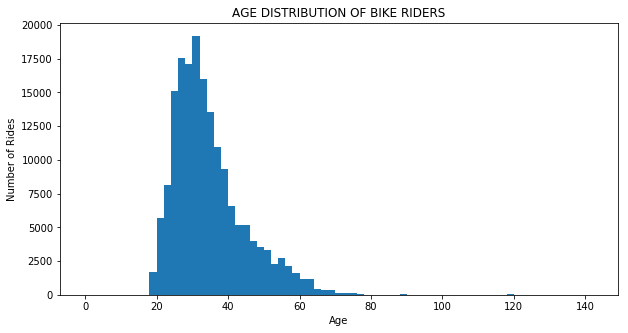

In [4]:
#Histogram showing the distribution of ages of riders
binsize = 2
bins = np.arange(0, gobike['member_age'].max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = gobike, x = 'member_age', bins = bins)
plt.title('AGE DISTRIBUTION OF BIKE RIDERS')
plt.xlabel('Age')
plt.ylabel('Number of Rides')
plt.show()


## Average trip duration for Genders

Male users made the most bike trips and with a percentage of 74.6% of the total bike trips made but with a lower average trip duration, and the female users with 23.3% having a higher average trip duration, followed by the others with 2.1% with the highest average trip duration.

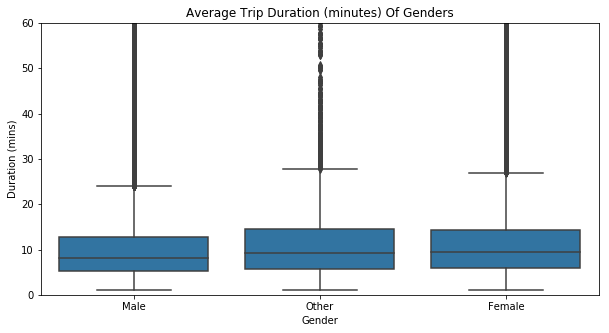

In [5]:
#plotting a box plot to examine duration in minutes and gender
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]
sb.boxplot(data = gobike, x = 'member_gender', y = 'duration_min', color = base_color)
plt.ylim([0, 60])
plt.title('Average Trip Duration (minutes) Of Genders')
plt.xlabel('Gender')
plt.ylabel('Duration (mins)')
plt.show()

## Average trip duration for type of user

The subscribers made 90.5% of the trips while the customers made 9.5% of the total trips, also the customer users have the highest average trip duration than the subscribing user despite being less in number.

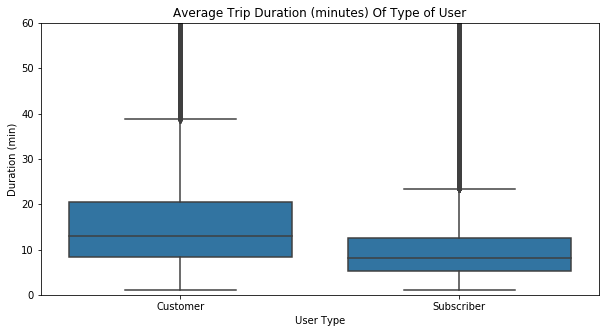

In [6]:
#plotting box plot
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]
sb.boxplot(data = gobike, x = 'user_type', y = 'duration_min', color = base_color)
plt.ylim([0, 60])
plt.title('Average Trip Duration (minutes) Of Type of User')
plt.xlabel('User Type')
plt.ylabel('Duration (min)');

## Duration in minutes by Age and user type of bike trips

From the scatter plot it can be seen that both the Customer and Subscribing users have the same trends for age and trip duration but the subscribing users having a wider range of age group indicating that age plays a role for a member to subscribe especially for older memebers.

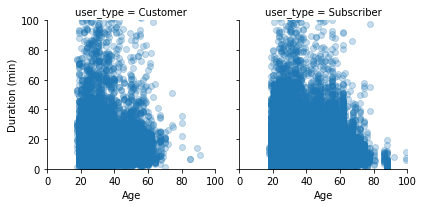

In [7]:
#Scatterplot for visualisation 
g= sb.FacetGrid(data = gobike, col = 'user_type', col_wrap = 2, xlim = [0, 100], ylim = [0, 100])
g.map(plt.scatter, 'member_age', 'duration_min', alpha=0.25)
g.set_xlabels('Age')
g.set_ylabels('Duration (min)');

## Duration in minutes by Age and Gender of bike trips

The male age group between 20 and 40 years of age took more longer trips than the female and other gender indicating that the age plays a factor on how long a rider travels.

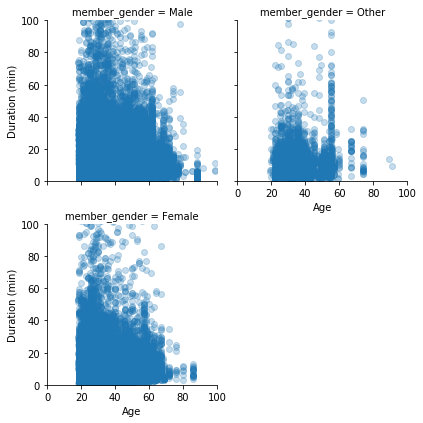

In [8]:
g= sb.FacetGrid(data = gobike, col = 'member_gender', col_wrap = 2, xlim = [0, 100], ylim = [0, 100])
g.map(plt.scatter, 'member_age', 'duration_min', alpha=0.25)
g.set_xlabels('Age')
g.set_ylabels('Duration (min)');

### Generate Slideshow
Run the command below to generate the HTML slideshow.

In [ ]:
# The command below will generate the HTML slideshow. 
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt 

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 312787 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not 


>In the classroom workspace, the generated HTML slideshow will be placed in the home folder.

>In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. 